In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)

IBMQ.save_account('3066a0e464d5ddedf6d32204505804954ee3d7449a8319efb380c197d911544bc4ed0dd04900541864385ad01cc685ccf0b1cfc0ec80d23d06461349c75ad636')
provider = IBMQ.load_account()

configrc.store_credentials:WARNING:2022-04-26 19:45:12,945: Credentials already present. Set overwrite=True to overwrite.


## Multiple Qubit Gates

Single qubits are interesting, but individually they offer no computational advantage. We will now look at how we represent multiple qubits, and how these qubits can interact with each other. We have seen how we can represent the state of a qubit using a 2D-vector, now we will see how we can represent the state of multiple qubits. 

In qiskit we have a range of multiple qubit case up for use:

    qc.cx(c,t)  # controlled X gate (CNOT)
    qc.cz(c,t)    # controlled Z-gate
    qc.cy(c,t)    # Controlled Y-gate
    qc.ch(c,t)    # Controlled Hadamard gate


Each of these gates required two inputs: `c` which is the control qubit and `t`, being the target qubit. A controlled gates works in such a way that if the `c`-qubit is in state $|1\rangle$ the controlled gate will be applied to the `t`-qubit. 




## 1. Work with CNOT-gate

<b> 1.) Apply the CNOT gate on the $|00\rangle$ state. What is the outcome?

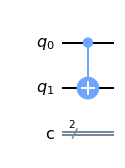

In [2]:
#Apply the CNOT gate to the 00 state
#
qc=QuantumCircuit(2,2)
#
qc.cx(0,1)
#
qc.draw('mpl')

<b> 2.) Apply the CNOT gate on the $|10\rangle$ state. What is the outcome?

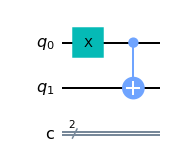

In [3]:
#Apply the CNOT gate to the 00 state
#
qc=QuantumCircuit(2,2)
#
qc.x(0)
qc.cx(0,1)

#
qc.draw('mpl')

## 2. Work with controlled gates

1.) Make a Bell state $|\psi\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)  $

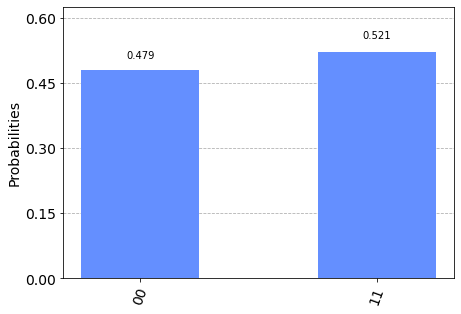

In [4]:
#Apply the CNOT gate to the 00 state
#
qc=QuantumCircuit(2,2)
#
qc.h(0)
qc.cx(0,1)

#

for i in range(2):
    qc.measure(i,i)


backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1024).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) 


2.) Make a Bell state $|\psi\rangle = \frac{1}{\sqrt{2}} (|10\rangle - |01\rangle)  $

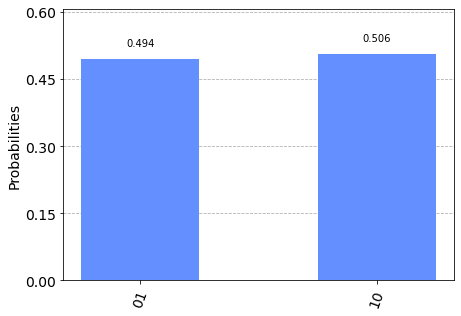

In [5]:
#Apply the CNOT gate to the 00 state
#
qc=QuantumCircuit(2,2)
#
qc.h(0)
qc.x(1)
qc.z(0)
qc.cx(0,1)
#

for i in range(2):
    qc.measure(i,i)


backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1024).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) 